<a href="https://colab.research.google.com/github/CelineNerima/nash_equilibrium_GT/blob/main/nash_equilibrium_GT_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Evolutionary Game Theory with Q-Learning

This notebook explores the integration of Q-learning into an Evolutionary Game Theory (EGT) model, focusing on how strategies evolve over time through learning and natural selection.


In [ ]:

import numpy as np
from numpy.random import choice

# Define parameters
alpha = 0.01  # Learning rate for Q-learning
gamma = 0.5 # Discount factor for future rewards in Q-learning
epsilon = 0.52 # Exploration rate in epsilon-greedy strategy
mutation_rate = 0.2  # Mutation rate in evolutionary process
rounds = 10  # Number of rounds in each game
generations = 15  # Number of generations for evolution
population_size = 10  # Size of the population

# Define payoffs
PAYOFFS = {
    ('Cooperate', 'Cooperate'): (3, 3),
    ('Cooperate', 'Defect'): (0, 5),
    ('Defect', 'Cooperate'): (5, 0),
    ('Defect', 'Defect'): (1, 1)
}


In [ ]:

Q_values = {strategy: 0 for strategy in PAYOFFS.keys()}

def q_learning_update(strategy, opponent_strategy, reward):
    state_action_pair = (strategy, opponent_strategy)
    best_next_action = max(Q_values, key=Q_values.get)
    Q_values[state_action_pair] = Q_values[state_action_pair] + alpha * (reward + gamma * Q_values[best_next_action] - Q_values[state_action_pair])


In [ ]:

def play_game(player1_strategy, player2_strategy):
    if (player1_strategy, player2_strategy) not in PAYOFFS:
        raise ValueError("Invalid strategy. Choose from 'Cooperate' or 'Defect'.")
    return PAYOFFS[(player1_strategy, player2_strategy)]


In [ ]:

def evolve_population(population, rounds, mutation_rate=0.1):
    strategies = list(set([s for sublist in PAYOFFS.keys() for s in sublist]))
    new_population = []

    for individual in population:
        # Choose strategy using epsilon-greedy policy
        if np.random.rand() < epsilon:
            strategy = np.random.choice(strategies)
        else:
            strategy = max(Q_values, key=Q_values.get)[0]  # Choose best strategy based on Q-values

        # Evaluate fitness
        fitness = {strategy: 0 for strategy in strategies}
        for opponent_strategy in strategies:
            payoff = play_game(strategy, opponent_strategy)
            fitness[strategy] += payoff[0]

        # Select the best strategy based on fitness
        best_strategy = max(fitness, key=fitness.get)

        # Mutation: with some probability, change the strategy
        if np.random.rand() < mutation_rate:
            best_strategy = np.random.choice(strategies)

        # Update Q-values based on the chosen strategy
        reward = fitness[best_strategy] / len(strategies)
        q_learning_update(strategy, best_strategy, reward)

        new_population.append(best_strategy)

    return new_population


In [ ]:

# Initialize population with random strategies
strategies = list(set([s for sublist in PAYOFFS.keys() for s in sublist]))
population = [np.random.choice(strategies) for _ in range(population_size)]

# Simulate evolution
print("Initial population:", population)
for generation in range(generations):
    population = evolve_population(population, rounds)
    print(f"Generation {generation + 1}: {population}")


Initial population: ['Defect', 'Cooperate', 'Defect', 'Cooperate', 'Cooperate', 'Defect', 'Defect', 'Cooperate', 'Defect', 'Cooperate']
Generation 1: ['Cooperate', 'Cooperate', 'Cooperate', 'Cooperate', 'Cooperate', 'Defect', 'Defect', 'Cooperate', 'Cooperate', 'Cooperate']
Generation 2: ['Cooperate', 'Cooperate', 'Cooperate', 'Cooperate', 'Cooperate', 'Defect', 'Cooperate', 'Cooperate', 'Defect', 'Defect']
Generation 3: ['Defect', 'Cooperate', 'Defect', 'Cooperate', 'Cooperate', 'Defect', 'Defect', 'Cooperate', 'Cooperate', 'Defect']
Generation 4: ['Cooperate', 'Cooperate', 'Cooperate', 'Cooperate', 'Cooperate', 'Defect', 'Defect', 'Cooperate', 'Cooperate', 'Cooperate']
Generation 5: ['Defect', 'Cooperate', 'Cooperate', 'Cooperate', 'Defect', 'Cooperate', 'Cooperate', 'Cooperate', 'Defect', 'Defect']
Generation 6: ['Cooperate', 'Cooperate', 'Defect', 'Defect', 'Cooperate', 'Cooperate', 'Cooperate', 'Cooperate', 'Cooperate', 'Cooperate']
Generation 7: ['Cooperate', 'Defect', 'Cooperate

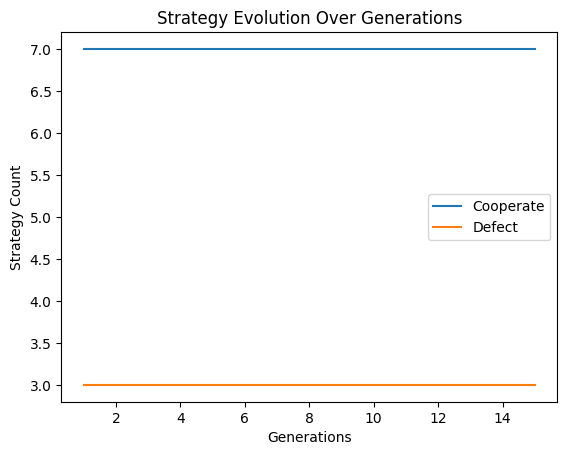

In [ ]:

import matplotlib.pyplot as plt

# Example visualization of strategy distribution over generations (placeholder code)
# You would collect the data during simulation and then plot it.

# Sample data for plotting
generations_data = list(range(1, generations + 1))
cooperate_counts = [population.count('Cooperate') for _ in generations_data]  # Replace with actual data
defect_counts = [population.count('Defect') for _ in generations_data]  # Replace with actual data

plt.plot(generations_data, cooperate_counts, label='Cooperate')
plt.plot(generations_data, defect_counts, label='Defect')
plt.xlabel('Generations')
plt.ylabel('Strategy Count')
plt.title('Strategy Evolution Over Generations')
plt.legend()
plt.show()
